# PCA Project 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Cleaning Data

In [5]:
dataset = data.select_dtypes(include=['float64', 'int64'])
dataset.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [7]:
dataset = dataset.drop(columns = ['LotFrontage','GarageYrBlt'] , axis =1)

In [8]:
dataset.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [9]:
columns = dataset.columns

In [10]:
for column in columns:
    dataset[column] = dataset[column].fillna(dataset[column].mean())

In [11]:
dataset.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [12]:
dataset = dataset.drop(columns = ['Id'] , axis =1)

In [13]:
dependent = dataset['SalePrice']

# Checking for outliers

MSSubClass

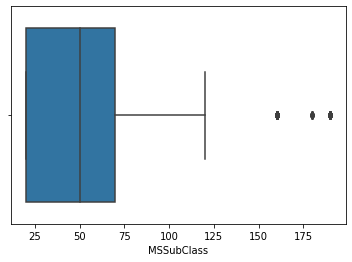

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(dataset['MSSubClass'])
plt.show()

In [15]:
Q1 = np.percentile(dataset['MSSubClass'], 25)
Q2 = np.percentile(dataset ['MSSubClass'], 50)
Q3 = np.percentile(dataset ['MSSubClass'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset = dataset [dataset ['MSSubClass']<upper_limit]

-55.0 145.0


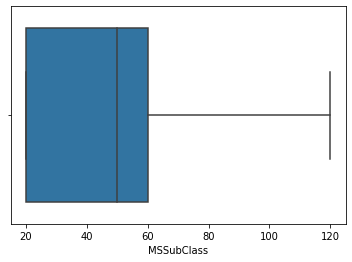

In [16]:
sns.boxplot(dataset['MSSubClass'])
plt.show()

LotArea 

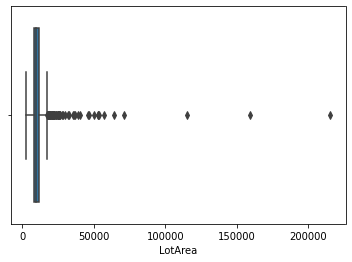

In [17]:
sns.boxplot(dataset['LotArea'])
plt.show()

In [18]:
Q1 = np.percentile(dataset['LotArea'], 25)
Q2 = np.percentile(dataset ['LotArea'], 50)
Q3 = np.percentile(dataset ['LotArea'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset = dataset [dataset ['LotArea']<upper_limit]

2177.0 17521.0


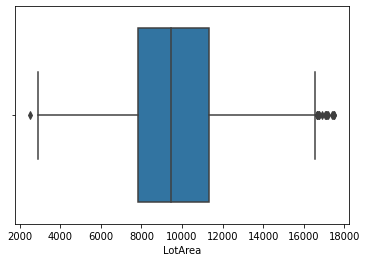

In [19]:
sns.boxplot(dataset['LotArea'])
plt.show()

OverallQual

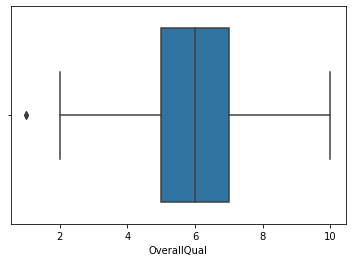

In [20]:
sns.boxplot(dataset['OverallQual'])
plt.show()

OverallCond 

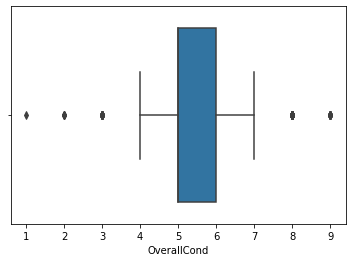

In [21]:
sns.boxplot(dataset['OverallCond'])
plt.show()

In [22]:
Q1 = np.percentile(dataset['OverallCond'], 25)
Q2 = np.percentile(dataset ['OverallCond'], 50)
Q3 = np.percentile(dataset ['OverallCond'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset = dataset [dataset ['OverallCond'] < upper_limit]
dataset = dataset [dataset ['OverallCond'] > lower_limit]

3.5 7.5


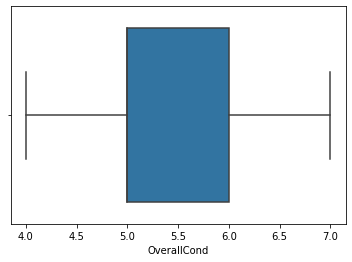

In [23]:
sns.boxplot(dataset['OverallCond'])
plt.show()

YearBuilt 

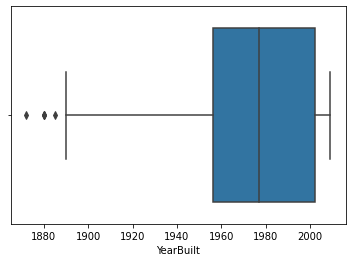

In [24]:
sns.boxplot(dataset['YearBuilt'])
plt.show()

In [25]:
Q1 = np.percentile(dataset['YearBuilt'], 25)
Q2 = np.percentile(dataset ['YearBuilt'], 50)
Q3 = np.percentile(dataset ['YearBuilt'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset = dataset [dataset ['YearBuilt'] > lower_limit]

1887.0 2071.0


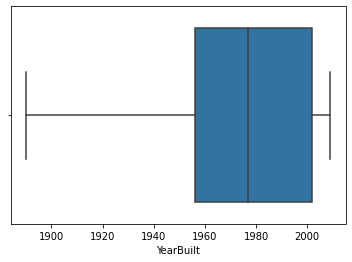

In [26]:
sns.boxplot(dataset['YearBuilt'])
plt.show()

YearRemodAdd

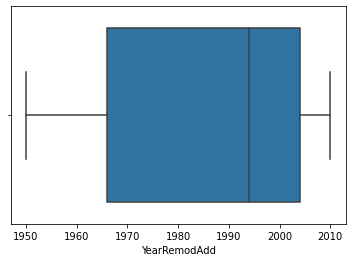

In [27]:
sns.boxplot(dataset['YearRemodAdd'])
plt.show()

MasVnrArea

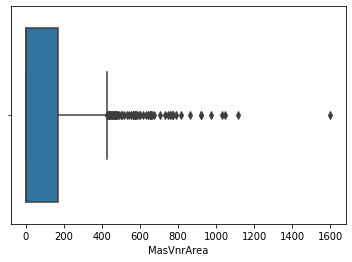

In [28]:
sns.boxplot(dataset['MasVnrArea'])
plt.show()

In [29]:
Q1 = np.percentile(dataset['MasVnrArea'], 25)
Q2 = np.percentile(dataset ['MasVnrArea'], 50)
Q3 = np.percentile(dataset ['MasVnrArea'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset = dataset [dataset ['MasVnrArea'] < upper_limit]

-255.0 425.0


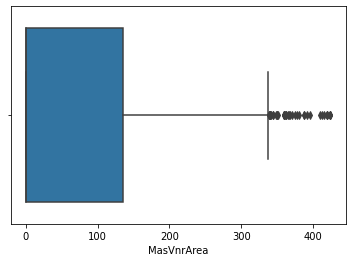

In [30]:
sns.boxplot(dataset['MasVnrArea'])
plt.show()

BsmtFinSF1 

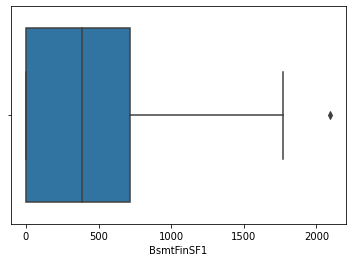

In [31]:
sns.boxplot(dataset['BsmtFinSF1'])
plt.show()

BsmtFinSF2

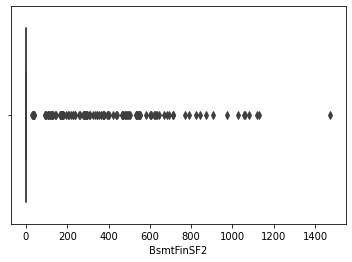

In [32]:
sns.boxplot(dataset['BsmtFinSF2'])
plt.show()

In [33]:
dataset = dataset.drop(columns = ['BsmtFinSF2'] , axis =1)

BsmtUnfSF

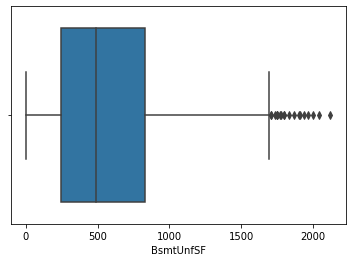

In [34]:
sns.boxplot(dataset['BsmtUnfSF'])
plt.show()

In [35]:
Q1 = np.percentile(dataset['BsmtUnfSF'], 25)
Q2 = np.percentile(dataset ['BsmtUnfSF'], 50)
Q3 = np.percentile(dataset ['BsmtUnfSF'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset = dataset [dataset ['BsmtUnfSF'] < upper_limit]

-631.5 1708.5


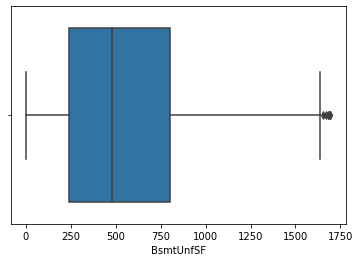

In [36]:
sns.boxplot(dataset['BsmtUnfSF'])
plt.show()

TotalBsmtSF

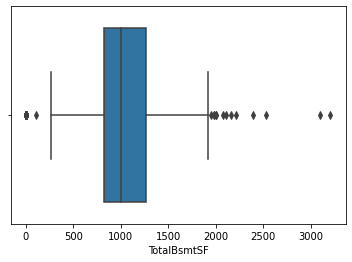

In [37]:
sns.boxplot(dataset['TotalBsmtSF'])
plt.show()

In [38]:
Q1 = np.percentile(dataset['TotalBsmtSF'], 25)
Q2 = np.percentile(dataset ['TotalBsmtSF'], 50)
Q3 = np.percentile(dataset ['TotalBsmtSF'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset = dataset [dataset ['TotalBsmtSF'] < upper_limit]

146.75 1938.75


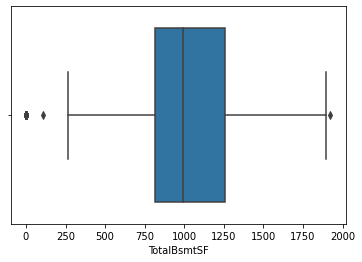

In [39]:
sns.boxplot(dataset['TotalBsmtSF'])
plt.show()

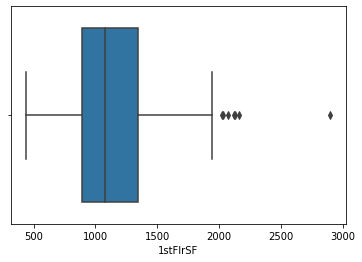

In [40]:
sns.boxplot(dataset['1stFlrSF'])
plt.show()


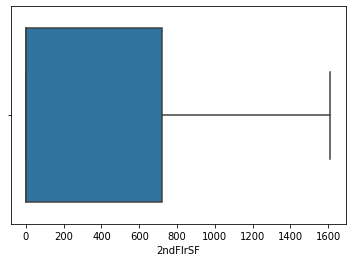

In [41]:
sns.boxplot(dataset['2ndFlrSF'])
plt.show()



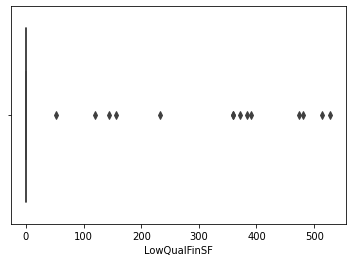

In [42]:
sns.boxplot(dataset['LowQualFinSF'])
plt.show()



In [43]:
dataset = dataset.drop('LowQualFinSF', axis = 1)


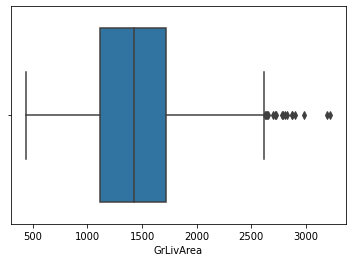

In [44]:
sns.boxplot(dataset['GrLivArea'])
plt.show()

218.5 2614.5


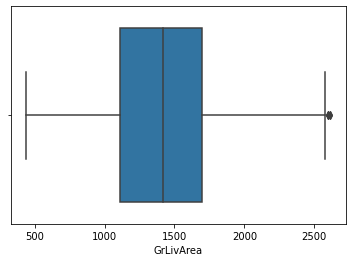

In [45]:

Q1 = np.percentile(dataset['GrLivArea'], 25)
Q2 = np.percentile(dataset ['GrLivArea'], 50)
Q3 = np.percentile(dataset ['GrLivArea'], 75)
IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit, upper_limit)
dataset = dataset [dataset ['GrLivArea'] < upper_limit] 

sns.boxplot(dataset['GrLivArea'])
plt.show()

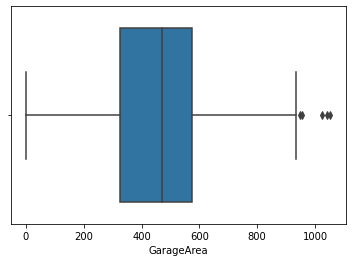

In [46]:
sns.boxplot(dataset['GarageArea'])
plt.show()

-44.5 945.5


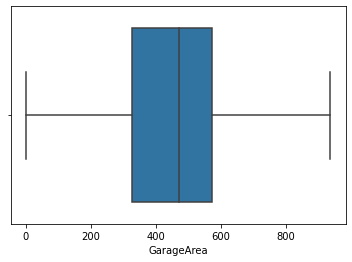

In [47]:

Q1 = np.percentile(dataset['GarageArea'], 25)
Q2 = np.percentile(dataset ['GarageArea'], 50)
Q3 = np.percentile(dataset ['GarageArea'], 75)
IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit, upper_limit)
dataset = dataset [dataset ['GarageArea'] < upper_limit] 

sns.boxplot(dataset['GarageArea'])
plt.show()

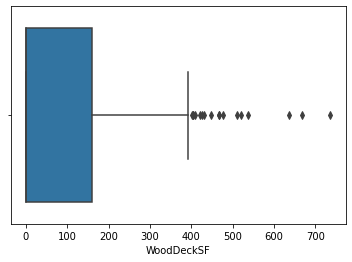

In [48]:
sns.boxplot(dataset['WoodDeckSF'])
plt.show()

-240.0 400.0


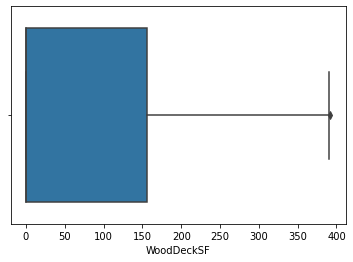

In [49]:

Q1 = np.percentile(dataset['WoodDeckSF'], 25)
Q2 = np.percentile(dataset ['WoodDeckSF'], 50)
Q3 = np.percentile(dataset ['WoodDeckSF'], 75)
IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit, upper_limit)
dataset = dataset [dataset ['WoodDeckSF'] < upper_limit] 

sns.boxplot(dataset['WoodDeckSF'])
plt.show()

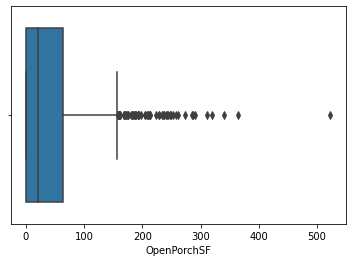

In [50]:
sns.boxplot(dataset['OpenPorchSF'])
plt.show()

-94.5 157.5


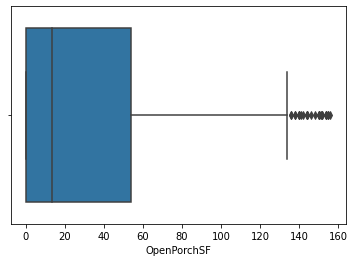

In [51]:
Q1 = np.percentile(dataset['OpenPorchSF'], 25)
Q2 = np.percentile(dataset ['OpenPorchSF'], 50)
Q3 = np.percentile(dataset ['OpenPorchSF'], 75)
IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit, upper_limit)
dataset = dataset [dataset ['OpenPorchSF'] < upper_limit] 

sns.boxplot(dataset['OpenPorchSF'])
plt.show()

-81.0 135.0


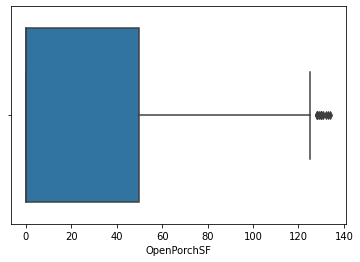

In [52]:
Q1 = np.percentile(dataset['OpenPorchSF'], 25)
Q2 = np.percentile(dataset ['OpenPorchSF'], 50)
Q3 = np.percentile(dataset ['OpenPorchSF'], 75)
IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit, upper_limit)
dataset = dataset [dataset ['OpenPorchSF'] < upper_limit] 

sns.boxplot(dataset['OpenPorchSF'])
plt.show()

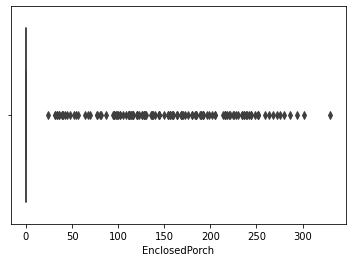

In [53]:
sns.boxplot(dataset['EnclosedPorch'])
plt.show()

In [54]:
dataset = dataset.drop('EnclosedPorch', axis = 1)

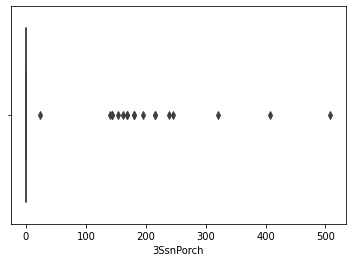

In [55]:
sns.boxplot(dataset['3SsnPorch'])
plt.show()

In [56]:
dataset = dataset.drop('3SsnPorch', axis = 1)

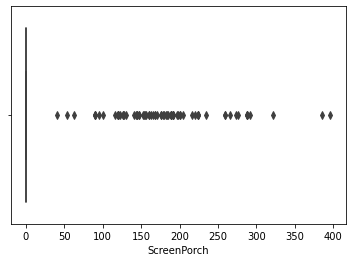

In [57]:
sns.boxplot(dataset['ScreenPorch'])
plt.show()

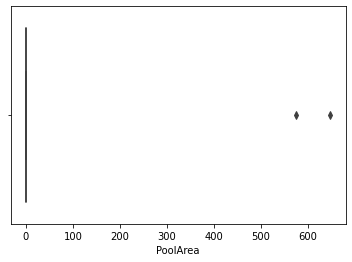

In [58]:
sns.boxplot(dataset['PoolArea'])
plt.show()

In [59]:
dataset = dataset.drop('PoolArea', axis = 1)

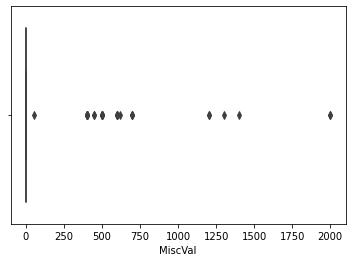

In [60]:
sns.boxplot(dataset['MiscVal'])
plt.show()

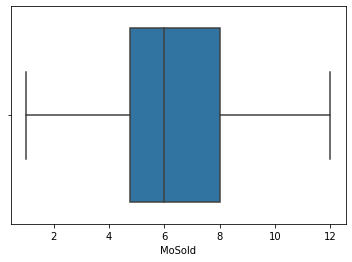

In [61]:
sns.boxplot(dataset['MoSold'])
plt.show()

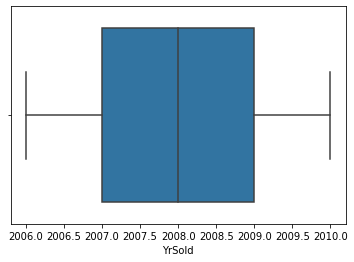

In [62]:
sns.boxplot(dataset['YrSold'])
plt.show()

# Correlation

In [63]:
data_corr = dataset.corr()
data_corr

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.294433,0.249932,-0.160816,0.170445,0.138604,0.065517,-0.014266,-0.053566,-0.103675,...,0.138931,0.145565,0.054226,0.081091,0.069194,0.041714,-0.045465,0.043208,-0.000927,0.145460
LotArea,-0.294433,1.000000,0.123416,-0.039570,0.121225,0.083144,0.125600,0.131192,-0.012503,0.155461,...,0.192191,0.181764,0.213461,0.104986,0.090632,0.068179,0.047699,-0.012198,-0.020676,0.291485
OverallQual,0.249932,0.123416,1.000000,-0.218720,0.620291,0.547760,0.355656,0.159802,0.283660,0.471949,...,0.361621,0.556761,0.493704,0.231717,0.401331,0.054207,-0.066438,0.079461,-0.014018,0.819782
OverallCond,-0.160816,-0.039570,-0.218720,1.000000,-0.437561,-0.112088,-0.142065,-0.034033,-0.150785,-0.186186,...,-0.054146,-0.260725,-0.207003,-0.071156,-0.188177,0.118538,0.129698,-0.004867,0.059292,-0.202808
YearBuilt,0.170445,0.121225,0.620291,-0.437561,1.000000,0.680886,0.286349,0.222813,0.165228,0.414129,...,0.141448,0.562378,0.495546,0.283672,0.383777,-0.068887,-0.079216,0.045032,-0.001477,0.648299
YearRemodAdd,0.138604,0.083144,0.547760,-0.112088,0.680886,1.000000,0.133320,0.113715,0.182916,0.318772,...,0.107988,0.442190,0.376500,0.266962,0.329690,-0.025828,-0.048476,0.013435,0.038477,0.588594
MasVnrArea,0.065517,0.125600,0.355656,-0.142065,0.286349,0.133320,1.000000,0.225945,0.078619,0.314514,...,0.250100,0.328889,0.319843,0.158497,0.190631,0.040049,-0.057003,0.034373,0.021649,0.397652
BsmtFinSF1,-0.014266,0.131192,0.159802,-0.034033,0.222813,0.113715,0.225945,1.000000,-0.580934,0.446605,...,0.156520,0.172516,0.235923,0.192420,0.101600,0.064552,0.001665,0.025472,0.031834,0.351568
BsmtUnfSF,-0.053566,-0.012503,0.283660,-0.150785,0.165228,0.182916,0.078619,-0.580934,1.000000,0.389884,...,0.030879,0.172001,0.125606,-0.034918,0.108038,-0.027790,-0.063483,0.030798,-0.059449,0.165198
TotalBsmtSF,-0.103675,0.155461,0.471949,-0.186186,0.414129,0.318772,0.314514,0.446605,0.389884,1.000000,...,0.195859,0.365619,0.403528,0.210882,0.222008,0.052276,-0.079734,0.047778,-0.018889,0.564727


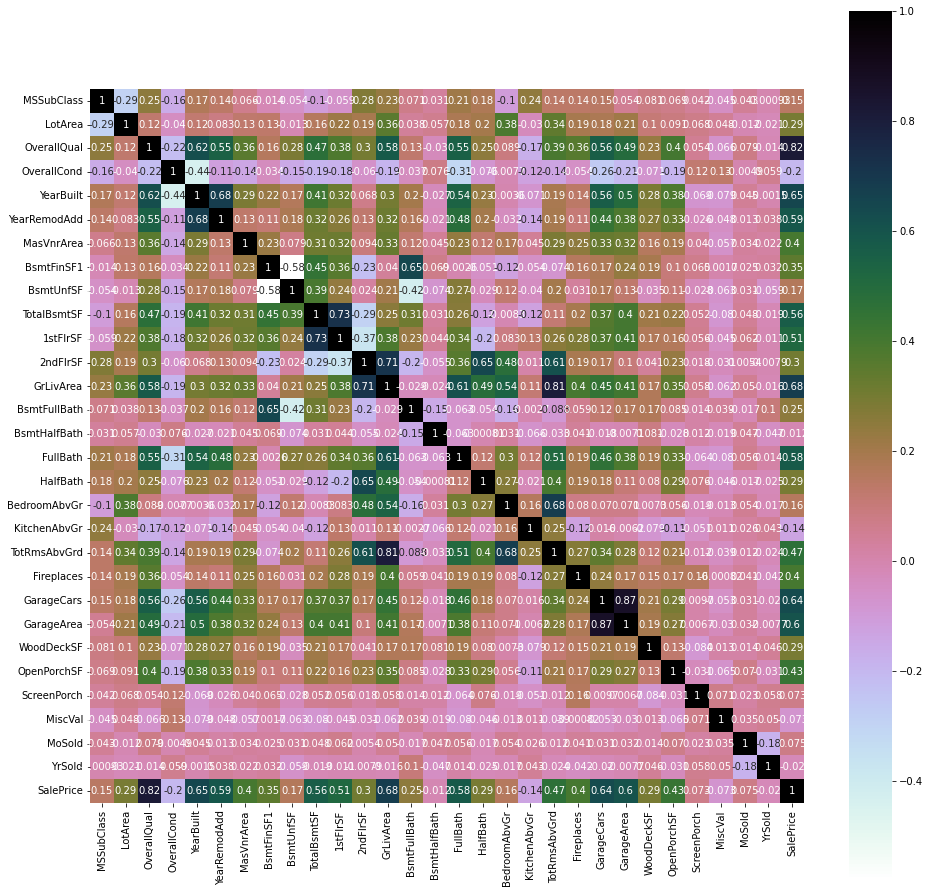

In [64]:
plt.figure(figsize=(16,16))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [65]:
data_corr = data_corr['SalePrice'][:-1]
data_corr[abs(data_corr)>=0.30].sort_values(ascending = False)

OverallQual     0.819782
GrLivArea       0.684283
YearBuilt       0.648299
GarageCars      0.635145
GarageArea      0.603870
YearRemodAdd    0.588594
FullBath        0.576071
TotalBsmtSF     0.564727
1stFlrSF        0.512431
TotRmsAbvGrd    0.468740
OpenPorchSF     0.432752
MasVnrArea      0.397652
Fireplaces      0.397091
BsmtFinSF1      0.351568
2ndFlrSF        0.303534
Name: SalePrice, dtype: float64

In [66]:
dataset.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [67]:
datanew = dataset.drop(columns = [ 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'])

In [68]:
datanew.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF
0,60,8450,7,5,2003,2003,196.0,706,856,856,854,1710,2,8,0,2,548,61
2,60,11250,7,5,2001,2002,162.0,486,920,920,866,1786,2,6,1,2,608,42
3,70,9550,7,5,1915,1970,0.0,216,756,961,756,1717,1,7,1,3,642,35
4,60,14260,8,5,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,3,836,84
5,50,14115,5,5,1993,1995,0.0,732,796,796,566,1362,1,5,0,2,480,30


In [69]:
datanew['SalePrice'] = dataset['SalePrice']

In [70]:
datanew.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,856,856,854,1710,2,8,0,2,548,61,208500
2,60,11250,7,5,2001,2002,162.0,486,920,920,866,1786,2,6,1,2,608,42,223500
3,70,9550,7,5,1915,1970,0.0,216,756,961,756,1717,1,7,1,3,642,35,140000
4,60,14260,8,5,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,3,836,84,250000
5,50,14115,5,5,1993,1995,0.0,732,796,796,566,1362,1,5,0,2,480,30,143000


In [71]:
datanew = datanew.drop('SalePrice', axis = 1)

# Scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
datanew = sc.fit_transform(datanew)
datanew = pd.DataFrame(datanew)
datanew

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.4,0.380610,0.625,0.333333,0.949580,0.883333,0.463357,0.436072,0.445369,0.243023,0.530106,0.588072,0.666667,0.555556,0.000000,0.50,0.585470,0.455224
1,0.4,0.572181,0.625,0.333333,0.932773,0.866667,0.382979,0.300185,0.478668,0.280233,0.537554,0.623209,0.666667,0.333333,0.333333,0.50,0.649573,0.313433
2,0.5,0.455870,0.625,0.333333,0.210084,0.333333,0.000000,0.133416,0.393340,0.304070,0.469274,0.591308,0.333333,0.444444,0.333333,0.75,0.685897,0.261194
3,0.4,0.778120,0.750,0.333333,0.924370,0.833333,0.827423,0.404571,0.595734,0.411047,0.653631,0.813685,0.666667,0.666667,0.333333,0.75,0.893162,0.626866
4,0.3,0.768199,0.375,0.333333,0.865546,0.750000,0.000000,0.452131,0.414152,0.208140,0.351335,0.427184,0.333333,0.222222,0.000000,0.50,0.512821,0.223881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.0,0.980432,0.375,0.333333,0.974790,0.933333,0.000000,0.000000,0.593132,0.408140,0.000000,0.324549,0.333333,0.333333,0.000000,0.00,0.000000,0.417910
944,0.0,0.315613,0.625,0.333333,0.957983,0.916667,0.000000,0.253243,0.635276,0.455233,0.000000,0.361997,0.666667,0.333333,0.000000,0.50,0.427350,0.843284
945,0.4,0.344143,0.500,0.333333,0.915966,0.833333,0.000000,0.000000,0.495838,0.299419,0.430788,0.558946,0.666667,0.444444,0.333333,0.50,0.491453,0.298507
946,0.0,0.703886,0.500,0.666667,0.739496,0.633333,0.281324,0.487956,0.802289,0.950581,0.000000,0.755895,0.666667,0.444444,0.666667,0.50,0.534188,0.000000


# PCA

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
datanew = pca.fit_transform(datanew)
datanew = pd.DataFrame(datanew)
datanew

,0,1,2
0,25667.021097,0.628904,0.232818
1,-1332.978903,0.601665,0.234454
2,40667.021097,-0.062721,0.471370
3,-42832.978903,1.080772,0.200680
4,67167.021097,0.116286,0.000966
...,...,...,...
943,-39832.978903,-0.031123,-0.258913
944,-45332.978903,0.431136,-0.314297
945,-57932.978903,0.357010,0.360698
946,-39832.978903,0.310487,-0.523810


In [84]:
dependent.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [85]:
dependent.isnull().sum()

0

In [86]:
datanew['SalePrice'] = dependent
datanew

,0,1,2,SalePrice
0,25667.021097,0.628904,0.232818,208500
1,-1332.978903,0.601665,0.234454,181500
2,40667.021097,-0.062721,0.471370,223500
3,-42832.978903,1.080772,0.200680,140000
4,67167.021097,0.116286,0.000966,250000
...,...,...,...,...
943,-39832.978903,-0.031123,-0.258913,143000
944,-45332.978903,0.431136,-0.314297,137500
945,-57932.978903,0.357010,0.360698,124900
946,-39832.978903,0.310487,-0.523810,143000


# Spliting  Dataset

In [87]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(datanew, test_size=0.25)

In [88]:
train.head()

,0,1,2,SalePrice
926,102167.021097,-0.571593,0.154173,285000
0,25667.021097,0.628904,0.232818,208500
669,-45332.978903,0.947216,-0.777580,137500
483,-18832.978903,0.883589,0.391235,164000
719,-54332.978903,-0.511254,-0.242328,128500


In [89]:
test.head()

,0,1,2,SalePrice
274,-58332.978903,0.171274,-0.503682,124500
380,-55832.978903,0.411025,0.291844,127000
875,120644.021097,0.828847,0.303959,303477
923,10167.021097,0.171732,0.157546,193000
896,-76332.978903,0.086017,-0.436257,106500


In [90]:
y_train = train['SalePrice']
X_train = train.drop('SalePrice', axis = 1)
y_test = test['SalePrice']
X_test = test.drop('SalePrice', axis = 1)

# Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [94]:
from sklearn.metrics import r2_score
pred_train = LR.predict(X_train)
model_score_train = r2_score(y_train, pred_train)
model_score_train

1.0

In [96]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

model_pred = LR.predict(X_test)
model_score= LR.score(X_test, y_test)
print('Model score is:', model_score)
print('R_Squared Score of linear regression:', r2_score(y_test, model_pred))

Model score is: 1.0
R_Squared Score of linear regression: 1.0


In [97]:
submission_data = pd.DataFrame({'SalePrice':model_pred, "Actual SalePrice": y_test})
submission_data

,SalePrice,Actual SalePrice
274,124500.0,124500
380,127000.0,127000
875,303477.0,303477
923,193000.0,193000
896,106500.0,106500
...,...,...
201,171500.0,171500
124,181000.0,181000
603,151000.0,151000
332,284000.0,284000
